# 군집분석 (3) : kmeans
* k개의 평균을 정한다는 의미
* 군집 갯수를 사전에 선정하는 과정이 필요

## 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# 데이터 생성
n_samples = 300
n_features = 4
n_clusters = 5  # 실제 군집 수

# 군집 데이터를 생성
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_7873/1897458366.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


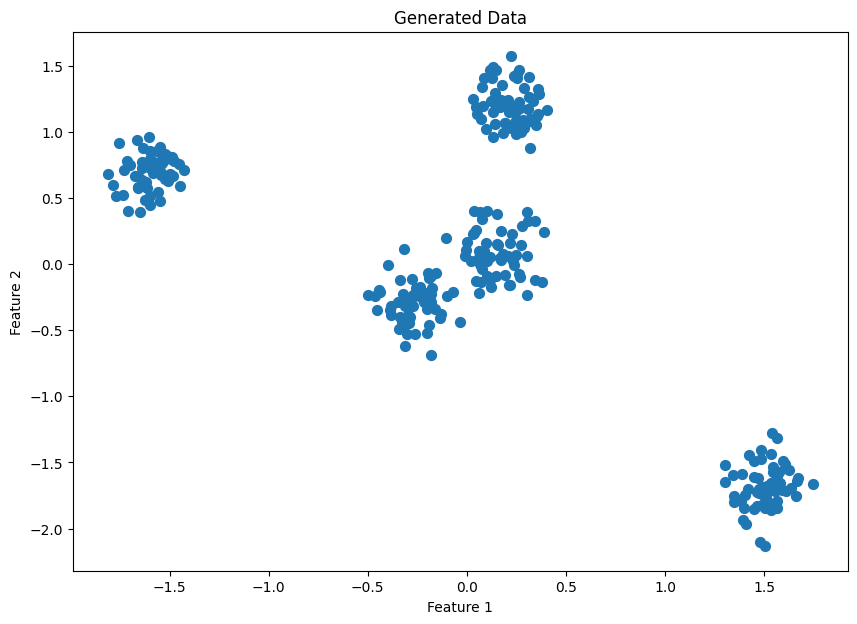

In [3]:
# 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 군집 갯수 선정

In [5]:
# 군집 수에 따른 WCSS (Within-Cluster Sum of Squares) 계산
wcss = []
for i in range(1, 11):  # 1부터 10까지 군집 수를 시험
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

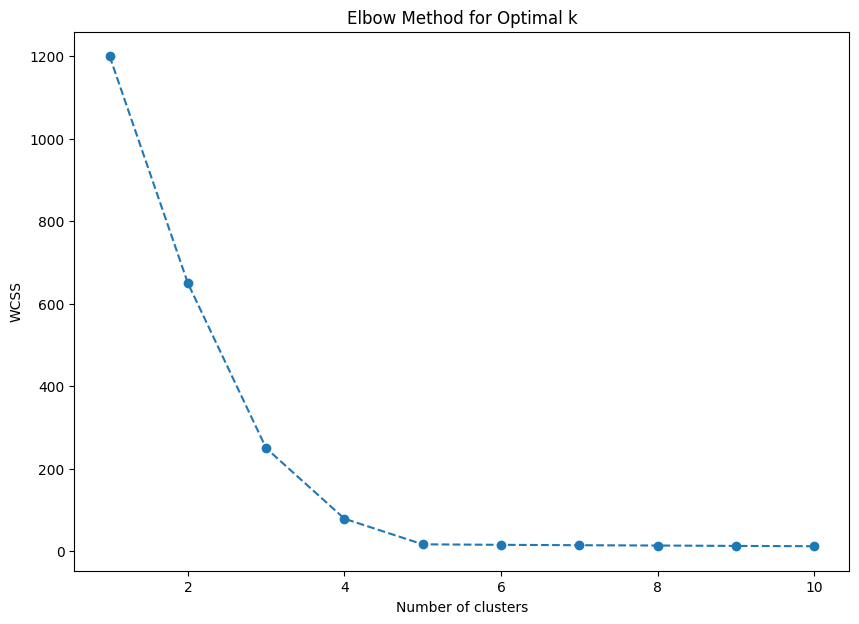

In [6]:
# 엘보우 방법 시각화
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# K-means 군집 분석
optimal_clusters = 5  # 엘보우 방법에서 결정된 군집 수
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

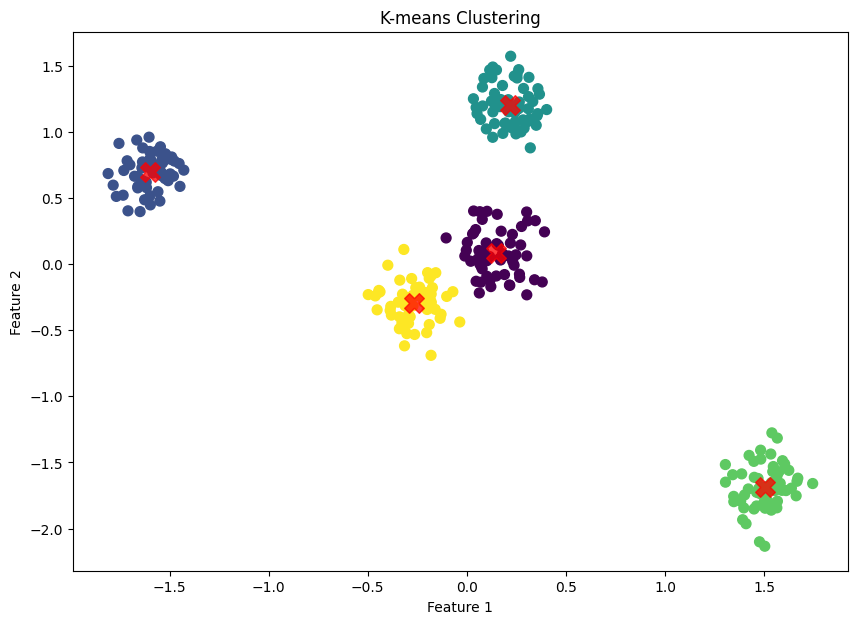

In [9]:
# 군집 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# 군집 품질 평가
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.84
